In [601]:
#loading packages
import pandas as pd
from pandas import DataFrame
import numpy as np
import random
import IPython
import mglearn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import matplotlib.pylab as plt
import scikitplot as skplt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree
from sklearn import metrics
from numpy import mean
from numpy import sqrt
from numpy import absolute
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statsmodels.api as sm
from mord import LogisticIT
import seaborn as sns
from dmba.metric import AIC_score
%matplotlib inline

In [602]:
#load data
club_df = pd.read_csv('CharlesBookClub.csv')

#dimensions of the df
club_df.shape

#first rows
club_df.head(3)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2,4,4,3,0,1


In [603]:
#convert variables into categories and check data types

club_df.Rcode = club_df.Rcode.astype('category')
club_df.Mcode = club_df.Mcode.astype('category')
club_df.Fcode = club_df.Fcode.astype('category')
club_df.Gender = club_df.Gender.astype('category')
club_df.Florence = club_df.Florence.astype('category')



In [604]:
#partitioning the data
predictors =['Mcode','Rcode','Fcode']
outcome = ['Yes_Florence']

x = club_df[predictors]
y = club_df[outcome]
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

trainData, validData = train_test_split(club_df, test_size=0.40, random_state=1)
print('Training:', trainData.shape)
print('Validation:', validData.shape)

Training: (2400, 24)
Validation: (1600, 24)


In [605]:
#working with trainData
valid_x

,Mcode,Rcode,Fcode
200,5,4,1
1078,5,3,1
610,4,2,3
2159,5,3,3
1169,4,2,1
2448,5,4,3
2938,5,4,2
813,4,4,3
1268,5,2,3
870,5,3,3


In [606]:
#distribution of Data in the train data
GenderT = trainData.Gender.value_counts()
RcodeT = trainData.Rcode.value_counts()
McodeT = trainData.Mcode.value_counts()
FcodeT = trainData.Fcode.value_counts()


In [607]:
print(GenderT)
print(RcodeT)
print(RcodeT)
print(McodeT)
print(FcodeT)

1    1696
0     704
Name: Gender, dtype: int64
4    1094
3     795
2     333
1     178
Name: Rcode, dtype: int64
4    1094
3     795
2     333
1     178
Name: Rcode, dtype: int64
5    1239
4     715
3     302
2     112
1      32
Name: Mcode, dtype: int64
3    939
1    740
2    721
Name: Fcode, dtype: int64


In [608]:
#overall response rate

overall = trainData["Yes_Florence"].mean()
overall

0.08833333333333333

In [609]:
#response rate for RFM combinations

train_response_rate = trainData.groupby(['Rcode','Fcode','Mcode'], as_index= False).Yes_Florence.mean().dropna().sort_values(by='Yes_Florence',ascending=False).rename(columns={"Yes_Florence":"Response_Rate"})
train_response_rate.head()

,Rcode,Fcode,Mcode,Response_Rate
6,1,2,2,0.666667
15,2,1,1,0.400000
16,2,1,2,0.333333
27,2,3,3,0.333333
12,1,3,3,0.333333


In [612]:
#RFM combination response rate higher than overall response rate 

train_response_rate_higher = train_response_rate[train_response_rate.Response_Rate > overall]
train_response_rate_higher

,Rcode,Fcode,Mcode,Response_Rate
6,1,2,2,0.666667
15,2,1,1,0.400000
16,2,1,2,0.333333
27,2,3,3,0.333333
12,1,3,3,0.333333
28,2,3,4,0.200000
3,1,1,4,0.200000
29,2,3,5,0.177778
4,1,1,5,0.173913
19,2,1,5,0.172414


In [613]:
#Response rate in the validation using RFM combinations

validation_response_rate = pd.merge(validData, train_response_rate, on=['Rcode','Fcode','Mcode']) .sort_values(by='ID#',ascending=True)
print("valid response rate is:" )
print(validation_response_rate.Yes_Florence.mean())
validation_response_rate[['Rcode','Fcode','Mcode','Response_Rate']]

valid response rate is:
0.07832080200501253


,Rcode,Fcode,Mcode,Response_Rate
1128,1,1,5,0.173913
127,3,1,5,0.035088
1236,4,1,4,0.111111
1252,4,1,4,0.111111
929,1,3,5,0.153846
925,1,3,5,0.153846
1219,2,1,5,0.172414
1245,4,1,4,0.111111
1420,4,1,3,0.140845
206,3,3,5,0.136585


In [614]:
result = []
for value in train_response_rate["Response_Rate"]:
    if value > 2*overall:
        result.append("RR_Twice")
    elif value > overall and value < 2*overall:
        result.append("RR_Above")
    else:
        result.append("RR_Below")
    
train_response_rate["Result"] = result
print(train_response_rate)

   Rcode Fcode Mcode  Response_Rate    Result
6      1     2     2       0.666667  RR_Twice
15     2     1     1       0.400000  RR_Twice
16     2     1     2       0.333333  RR_Twice
27     2     3     3       0.333333  RR_Twice
12     1     3     3       0.333333  RR_Twice
28     2     3     4       0.200000  RR_Twice
3      1     1     4       0.200000  RR_Twice
29     2     3     5       0.177778  RR_Twice
4      1     1     5       0.173913  RR_Above
19     2     1     5       0.172414  RR_Above
22     2     2     3       0.166667  RR_Above
23     2     2     4       0.161290  RR_Above
14     1     3     5       0.153846  RR_Above
17     2     1     3       0.150000  RR_Above
21     2     2     2       0.142857  RR_Above
47     4     1     3       0.140845  RR_Above
44     3     3     5       0.136585  RR_Above
48     4     1     4       0.111111  RR_Above
57     4     3     3       0.105263  RR_Above
30     3     1     1       0.100000  RR_Above
31     3     1     2       0.09090

In [447]:
validation_response_rate = pd.merge(validData, train_response_rate, on=['Rcode','Fcode','Mcode']) .sort_values(by='Response_Rate',ascending=False)
validation_response_rate[['Florence','Response_Rate']]

,Florence,Response_Rate
1586,0,0.666667
1585,0,0.666667
798,0,0.333333
796,0,0.333333
1591,0,0.333333
1590,0,0.333333
1589,0,0.333333
1588,0,0.333333
1587,0,0.333333
800,1,0.333333


C:\Users\sk\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


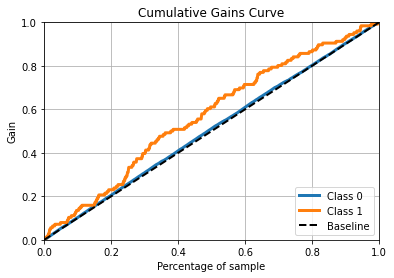

In [460]:

nb = GaussianNB()

nb.fit(train_x, train_y)

predicted_probas = nb.predict_proba(valid_x)


skplt.metrics.plot_cumulative_gain(valid_y, predicted_probas)

plt.show()

In [466]:
club_df.head(3)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2,4,4,3,0,1


In [518]:
df1 = club_df[['F','M','R','FirstPurch','Related Purchase']]
df1.head()

,F,M,R,FirstPurch,Related Purchase
0,2,297,14,22,0
1,2,128,8,10,0
2,7,138,22,56,2
3,1,228,2,2,0
4,1,257,10,10,0


<AxesSubplot:>

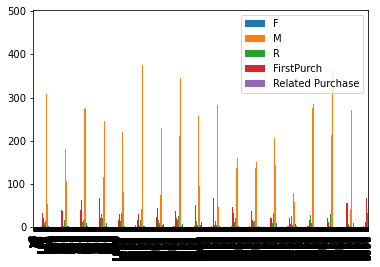

In [519]:
df1.plot(kind = 'bar')

In [536]:
#club_df['Florence']

In [521]:
df1.dtypes

F                   int64
M                   int64
R                   int64
FirstPurch          int64
Related Purchase    int64
dtype: object

In [522]:
#normalizing the data
# copy the data
df1_max_scaled = df1.copy()

# apply normalization techniques
for column in df1_max_scaled.columns:
    df1_max_scaled[column] = df1_max_scaled[column] / df1_max_scaled[column].abs().max()

# view normalized data
display(df1_max_scaled)


,F,M,R,FirstPurch,Related Purchase
0,0.166667,0.620042,0.388889,0.222222,0.000
1,0.166667,0.267223,0.222222,0.101010,0.000
2,0.583333,0.288100,0.611111,0.565657,0.250
3,0.083333,0.475992,0.055556,0.020202,0.000
4,0.083333,0.536534,0.277778,0.101010,0.000
5,0.166667,0.302714,0.166667,0.121212,0.000
6,0.083333,0.396660,0.444444,0.161616,0.125
7,0.083333,0.390397,0.388889,0.141414,0.000
8,0.083333,0.526096,0.277778,0.101010,0.000
9,0.250000,0.501044,0.166667,0.202020,0.000


<AxesSubplot:>

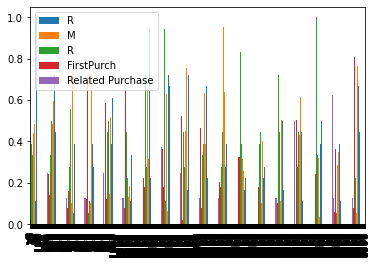

In [494]:
df1_max_scaled.plot(kind = 'bar')

In [523]:
#adding the florence column
df1_max_scaled.insert(5, 'Florence', club_df['Florence'])
df1_max_scaled

,F,M,R,FirstPurch,Related Purchase,Florence
0,0.166667,0.620042,0.388889,0.222222,0.000,0
1,0.166667,0.267223,0.222222,0.101010,0.000,0
2,0.583333,0.288100,0.611111,0.565657,0.250,0
3,0.083333,0.475992,0.055556,0.020202,0.000,0
4,0.083333,0.536534,0.277778,0.101010,0.000,0
5,0.166667,0.302714,0.166667,0.121212,0.000,0
6,0.083333,0.396660,0.444444,0.161616,0.125,0
7,0.083333,0.390397,0.388889,0.141414,0.000,0
8,0.083333,0.526096,0.277778,0.101010,0.000,0
9,0.250000,0.501044,0.166667,0.202020,0.000,0


In [558]:
#finding the best K

y = club_df['Florence']
x = club_df[['R','F','M','FirstPurch','Related Purchase']]
#x = club_df.drop(columns=['Florence'])
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)


    k  accuracy
0   1  0.853125
1   2  0.913125
2   3  0.905625
3   4  0.919375
4   5  0.913750
5   6  0.918125
6   7  0.915625
7   8  0.921250
8   9  0.920625
9  10  0.921250


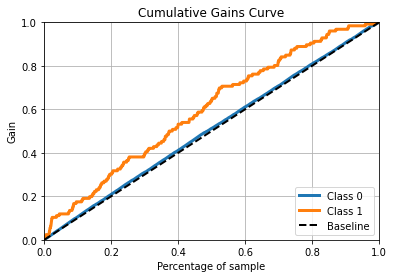

In [582]:
results = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_x))
    })
    
results = pd.DataFrame(results)
print(results)

nb = GaussianNB()
nb.fit(train_x, train_y)
predicted_probas = nb.predict_proba(valid_x)
skplt.metrics.plot_cumulative_gain(valid_y, predicted_probas)
plt.show()

In [617]:
#knn prediction
knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(train_x,train_y)

pred = knn.predict(valid_x)

print('WITH K=3')
print('\n')
print(confusion_matrix(valid_y,pred))
print('\n')
print(classification_report(valid_y,pred))


WITH K=3


[[1441   33]
 [ 124    2]]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1474
           1       0.06      0.02      0.02       126

    accuracy                           0.90      1600
   macro avg       0.49      0.50      0.49      1600
weighted avg       0.85      0.90      0.88      1600



C:\Users\sk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\sk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


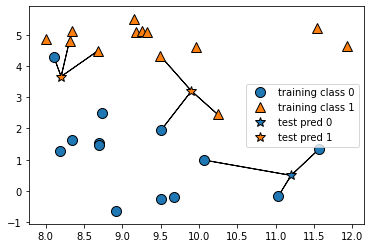

In [618]:

mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()


In [595]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
x_scaled = MinMaxScaler().fit_transform(x)

scores = cross_val_score(model, x_scaled, y, cv=7)

print ("Cross-validated scores:", scores)

Cross-validated scores: [0.89685315 0.8951049  0.8986014  0.89316988 0.89492119 0.89492119
 0.88791594]


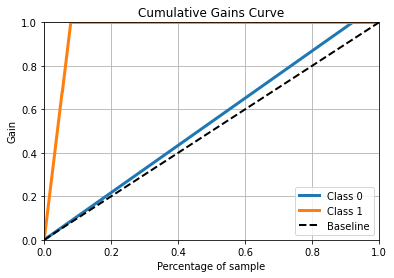

In [620]:
###Logistic Regression
#for the full set of 15 predictors in the dataset
y = club_df['Florence']
x = club_df.drop(columns=['Florence'])
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

logit_reg = LogisticRegression(penalty='l1', C=1e42, solver='liblinear')
logit_reg.fit(train_x, train_y)
'intercept',logit_reg.intercept_[0]
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=x.columns).transpose()
#cumulative gain
nb = GaussianNB()
nb.fit(train_x, train_y)
predicted_probas = nb.predict_proba(valid_x)
skplt.metrics.plot_cumulative_gain(valid_y, predicted_probas)
plt.show()

intercept -1.7956634528649031
         Seq#       ID#    Gender        M         R         F  FirstPurch  \
coeff -0.0002 -0.000052 -1.154372 -0.00455 -0.049997 -0.103824   -0.032074   

       ChildBks  YouthBks   CookBks  DoItYBks    RefBks    ArtBks   GeogBks  \
coeff  0.611368  0.892569  0.124368  0.139642  0.010577 -0.369628 -0.183838   

       Related Purchase     Mcode     Rcode     Fcode  Yes_Florence  \
coeff          0.444827 -0.310585 -0.373582 -0.245989     19.336524   

       No_Florence  
coeff    -3.384942  


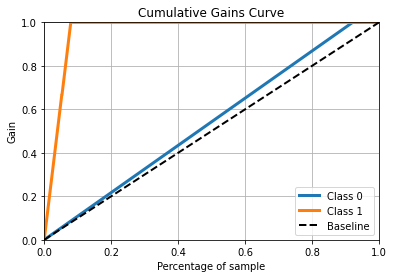

In [515]:
###Logistic Regression
#for the full set of predictors in the dataset
y = club_df['Florence']
x = club_df.drop(columns=['Florence','ItalAtlas','ItalArt','ItalCook'])
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

logit_reg = LogisticRegression(penalty='l1', C=1e42, solver='liblinear')
logit_reg.fit(train_x, train_y)
print('intercept',logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=x.columns).transpose())
#cumulative gain
nb = GaussianNB()
nb.fit(train_x, train_y)
predicted_probas = nb.predict_proba(valid_x)
skplt.metrics.plot_cumulative_gain(valid_y, predicted_probas)
plt.show()

intercept -2.029508185524563
             R         F         M
coeff -0.03123  0.096958 -0.001525


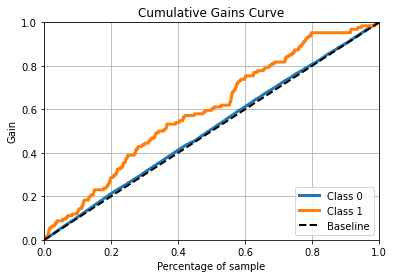

In [621]:
y = club_df['Florence']
x = club_df[['R','F','M']]
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty='l1', C=1e42, solver='liblinear')
logit_reg.fit(train_x, train_y)
print('intercept',logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=x.columns).transpose())
nb = GaussianNB()
nb.fit(train_x, train_y)
predicted_probas = nb.predict_proba(valid_x)
skplt.metrics.plot_cumulative_gain(valid_y, predicted_probas)
plt.show()